<a href="https://colab.research.google.com/github/vanviethieuanh/CS116.M11/blob/main/finalProjectCS116.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>RANDOM FOREST CLASSIFIER</b></h1>


| Tên thành viên    | MSSV     |
| ----------------- | -------- |
| Văn Viết Hiếu Anh | 19521225 |
| Văn Viết Nhật     | 19521958 |
| Lê Văn Phước      | 19522054 |

In [1]:
!!pip install sklearn-genetic-opt

['Collecting sklearn-genetic-opt',
 '  Downloading sklearn_genetic_opt-0.7.0-py3-none-any.whl (29 kB)',
 'Requirement already satisfied: tqdm>=4.61.1 in /usr/local/lib/python3.7/dist-packages (from sklearn-genetic-opt) (4.62.3)',
 'Requirement already satisfied: scikit-learn>=0.21.3 in /usr/local/lib/python3.7/dist-packages (from sklearn-genetic-opt) (1.0.1)',
 'Collecting deap>=1.3.1',
 '  Downloading deap-1.3.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (160 kB)',
 '\x1b[?25l',
 '\x1b[K     |██                              | 10 kB 24.1 MB/s eta 0:00:01',
 '\x1b[K     |████                            | 20 kB 31.0 MB/s eta 0:00:01',
 '\x1b[K     |██████                          | 30 kB 33.8 MB/s eta 0:00:01',
 '\x1b[K     |████████▏                       | 40 kB 17.3 MB/s eta 0:00:01',
 '\x1b[K     |██████████▏                     | 51 kB 20.1 MB/s eta 0:00:01',
 '\x1b[K     |████████████▏                   | 61 kB 5.7 MB/s eta 0:00

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import time
from math import cos, pi, exp, sqrt

import pandas as pd
import random as rand
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
DATASET_PATH = "https://raw.githubusercontent.com/vanviethieuanh/CS116.M11/main/dataset/"

dataset_list = pd.read_csv("https://raw.githubusercontent.com/vanviethieuanh/CS116.M11/main/dataset_list.csv")
file_paths = [DATASET_PATH + file_name for file_name in dataset_list['file_name'].to_list()]

# heart_failure_clinical_records_dataset.csv

In [4]:
df1 = pd.read_csv(file_paths[1])
df1 = df1.dropna()

In [5]:
df1.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 32.7 KB


In [ ]:
y = df1['DEATH_EVENT']
df1 = df1.drop(columns='DEATH_EVENT')

In [ ]:
X = df1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8

### Compare SVM

In [ ]:
svm =  make_pipeline(StandardScaler(), SVC())

In [ ]:
svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.75

### Grid Search

In [ ]:
# Tạo các mảng các giá trị của siêu tham số
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,300,10)
max_leaf_nodes_range = np.arange(2,35,1)

In [ ]:
# Tạo một lưới các tham số
param_grid = dict(max_features=max_features_range, 
                  n_estimators=n_estimators_range,
                  max_leaf_nodes=max_leaf_nodes_range)

In [ ]:
# Khởi tạo mô hình cần tối ưu hóa các siêu tham số
rf = RandomForestClassifier()

In [ ]:
# Sử dụng hàm GridSearch của thư viện sklearn để điểu chỉnh siêu tham số
grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=5)

In [ ]:
# Tiến hành đào tạo
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290])},
             scoring='roc_auc')

In [ ]:
import json

In [ ]:
grid.cv_results

In [ ]:
with open('grid_heart.json', 'w') as fp:
    json.dump(grid.cv_results_, fp)

In [ ]:
from google.colab import files
files.download('grid_heart.json') 

In [ ]:
# In ra kết quả
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

### GA Search

In [ ]:
param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              #'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30), 
              #'criterion': Categorical(['gini', 'entropy']),
              #'max_features': Categorical(['auto', 'sqrt', 'log2']),
              'max_leaf_nodes': Integer(2, 35), 
              'n_estimators': Integer(10, 300)}

In [ ]:
clf = RandomForestClassifier()

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True)

In [ ]:
evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=25,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_train,y_train.to_numpy())

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.830976	0.0569577  	0.891086   	0.702954   
1  	19    	0.882336	0.00897978 	0.891086   	0.862025   
2  	16    	0.888228	0.00594448 	0.895517   	0.878639   
3  	19    	0.890369	0.00315136 	0.895517   	0.886814   
4  	18    	0.887004	0.00672948 	0.895517   	0.874367   
5  	18    	0.889061	0.00332355 	0.891139   	0.882859   
6  	18    	0.88866 	0.00327718 	0.891139   	0.882859   
7  	16    	0.890285	0.00169579 	0.891139   	0.886867   
8  	18    	0.890332	0.00252714 	0.891297   	0.882753   
9  	18    	0.889109	0.00286623 	0.891297   	0.8827     
10 	19    	0.889119	0.00339926 	0.891297   	0.8827     
11 	19    	0.890037	0.00270467 	0.891403   	0.882911   
12 	19    	0.889225	0.00433158 	0.891403   	0.878639   
13 	18    	0.89009 	0.0037295  	0.891403   	0.878903   
14 	19    	0.892184	0.00161444 	0.895411   	0.891297   
15 	20    	0.887616	0.00760057 	0.891403   	0.870517   
16 	19    	0.888022	0.00701078 	0.891403   	0.87

GASearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=RandomForestClassifier(max_depth=19, max_leaf_nodes=26,
                                            min_weight_fraction_leaf=0.03491406999734386,
                                            n_estimators=253),
           generations=25, keep_top_k=4, n_jobs=-1,
           param_grid={'bootstrap': <sklearn_genetic.space.space.Categorical object at 0x7fb02b516ad0>,
                       'criterion': <sklearn_gen...
                       'max_features': <sklearn_genetic.space.space.Categorical object at 0x7fb02b516b90>,
                       'max_leaf_nodes': <sklearn_genetic.space.space.Integer object at 0x7fb02b516bd0>,
                       'min_weight_fraction_leaf': <sklearn_genetic.space.space.Continuous object at 0x7fb02b516a10>,
                       'n_estimators': <sklearn_genetic.space.space.Integer object at 0x7fb02b516c10>},
           return_train_score=True, scoring='accurac

In [ ]:
y_predicy_ga = evolved_estimator.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predicy_ga)

0.75

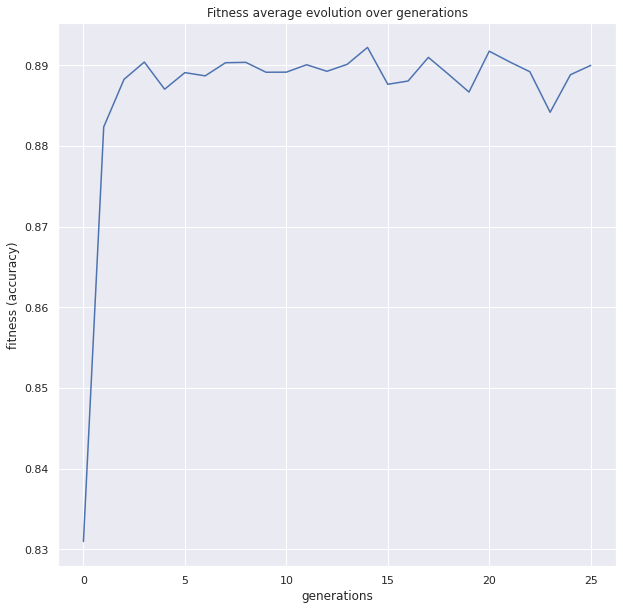

In [ ]:
plot_fitness_evolution(evolved_estimator)
plt.show()

In [ ]:
evolved_estimator.best_estimator_

RandomForestClassifier(max_depth=19, max_leaf_nodes=26,
                       min_weight_fraction_leaf=0.03491406999734386,
                       n_estimators=253)

In [ ]:
evolved_estimator.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 19,
 'max_features': 'auto',
 'max_leaf_nodes': 26,
 'min_weight_fraction_leaf': 0.03491406999734386,
 'n_estimators': 253}

In [ ]:
print("Best k solutions:")
evolved_estimator.hof

Best k solutions:


{0: {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 19,
  'max_features': 'auto',
  'max_leaf_nodes': 26,
  'min_weight_fraction_leaf': 0.03491406999734386,
  'n_estimators': 253},
 1: {'bootstrap': False,
  'criterion': 'gini',
  'max_depth': 7,
  'max_features': 'auto',
  'max_leaf_nodes': 7,
  'min_weight_fraction_leaf': 0.05422729611001322,
  'n_estimators': 276},
 2: {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 19,
  'max_features': 'auto',
  'max_leaf_nodes': 7,
  'min_weight_fraction_leaf': 0.05422729611001322,
  'n_estimators': 276},
 3: {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 19,
  'max_features': 'auto',
  'max_leaf_nodes': 26,
  'min_weight_fraction_leaf': 0.03491406999734386,
  'n_estimators': 276}}

### Tuning Using Evolutionary Algorithms

In [ ]:
def DE(f_,f_score, bounds, F_scale = 0.8, cross_prob = 0.7, popsize = 256, max_evaluation=10000):
  dimensions = len(bounds)

  lower_bound, upper_bound = np.asarray(bounds).T

  diff = np.fabs(lower_bound - upper_bound)

  pop = lower_bound + diff * np.random.rand(popsize, dimensions)

  
  fitness = np.asarray([-f_(*covert_array(ind)) for ind in pop])
  best_idx = np.argmin(fitness)
  count_evaluations = len(pop)
  count_gen = 1
  best = np.copy(pop[best_idx])
  results = []
  results.append((np.copy(best), -fitness[best_idx]))
  #fobj.write(f"{popsize},{count_gen},{-np.mean(fitness)},{0} \n")
  min_weight_fraction_leaf, bootstrap,max_depth,criterion,max_features,max_leaf_nodes,n_estimators = covert_array(best)
  fobj.write(f"{count_gen},{count_evaluations},{min_weight_fraction_leaf},{bootstrap},{max_depth},{criterion},{max_features},{max_leaf_nodes},{n_estimators},{-fitness[best_idx]},\n")
  done = True 

  while done:
    count_gen += 1
    for j in range(popsize):
      idxs = [idx for idx in range(popsize) if idx != j]
      a,b,c = pop[np.random.choice(idxs, 3, replace=False)]
      mutant = np.clip(a + F_scale*(b-c), lower_bound, upper_bound)

      cross_points = np.random.rand(dimensions) < cross_prob
      if not np.any(cross_points):
        cross_points[np.random.randint(0,dimensions)] = True

      trial = np.where(cross_points, mutant, pop[j])
      
      f = -f_(*covert_array(trial))
      count_evaluations += 1
      
      if f < fitness[j]:
        fitness[j] = f
        pop[j] = trial
        if f < fitness[best_idx]:
          best_idx = j
          best = trial

    print(count_evaluations)
    print(-fitness[best_idx])
    min_weight_fraction_leaf, bootstrap,max_depth,criterion,max_features,max_leaf_nodes,n_estimators = covert_array(best) 
    fobj.write(f"{count_gen},{count_evaluations},{min_weight_fraction_leaf},{bootstrap},{max_depth},{criterion},{max_features},{max_leaf_nodes},{n_estimators},{-fitness[best_idx]},\n")
    if count_evaluations + len(pop) > max_evaluation:
      done = False
      all_paramater = f_score(*covert_array(best))
    results.append((np.copy(best), -fitness[best_idx])) 


  return [results,all_paramater]

In [ ]:
def covert_array(array_):
  list_index_element_to_round=[1,2,3,4,5,6]
  list_index_element_to_string=[1,3,4]
  array_ = list(array_)
  #print(array_)
  for i in range(len(array_)):
    if i in list_index_element_to_round: 
      array_[i] = round(array_[i])
    if i in list_index_element_to_string:
      if i == 1: 
        if array_[i] == 1: array_[i] = True
        if array_[i] == 2: array_[i] = False
      if i == 3: 
        if array_[i] == 1: array_[i] = 'gini'
        if array_[i] == 2: array_[i] = 'entropy'
      if i == 4: 
        if array_[i] == 1: array_[i] = 'auto'
        if array_[i] == 2: array_[i] = 'sqrt'
        if array_[i] == 3: array_[i] = 'log2'
    
  
  return array_

In [ ]:
def Randomforest(min_weight_fraction_leaf_, bootstrap_,max_depth_,criterion_,max_features_,max_leaf_nodes_,n_estimators_):
  clf = RandomForestClassifier(min_weight_fraction_leaf = min_weight_fraction_leaf_,bootstrap = bootstrap_,max_depth = max_depth_,criterion=criterion_,\
                               max_features=max_features_,max_leaf_nodes=max_leaf_nodes_,n_estimators=int(n_estimators_))
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  return [min_weight_fraction_leaf_, bootstrap_,max_depth_,criterion_,max_features_,max_leaf_nodes_,n_estimators_,metrics.accuracy_score(y_test, y_pred),\
          metrics.recall_score(y_test, y_pred, average=None),precision_score (y_test, y_pred, average=None),\
          f1_score(y_test, y_pred, average=None),confusion_matrix(y_test, y_pred), y_pred]

In [ ]:
def RandomforestWithK_fold(min_weight_fraction_leaf_, bootstrap_,max_depth_,criterion_,max_features_,max_leaf_nodes_,n_estimators_):
  kfold = KFold(n_splits=5, shuffle=True)

  fold_idx = 1
  scores = []
  for train_ids, val_ids in kfold.split(X_train, y_train):

    clf = RandomForestClassifier(min_weight_fraction_leaf = min_weight_fraction_leaf_,bootstrap = bootstrap_,max_depth = max_depth_,criterion=criterion_,\
                                 max_features=max_features_,max_leaf_nodes=max_leaf_nodes_,n_estimators=int(n_estimators_))

    clf.fit(X_train.iloc[train_ids], y_train.iloc[train_ids])
    y_val_pred = clf.predict(X_train.iloc[val_ids])
    
    scores.append(metrics.accuracy_score(y_train.iloc[val_ids], y_val_pred))


  fold_idx = fold_idx + 1
  
  sum_num = 0
  avg = 0
  for t in scores:
    sum_num = sum_num + t           
  avg = sum_num / len(scores)

  
  
  return avg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### optimize 

In [ ]:
tic = time.perf_counter()
fobj = open('/content/drive/MyDrive/LogForPython/heart_failure_clinical_records_dataset.txt', 'w')
fobj.write("number gen,num of evaluations,min weight fraction leaf,bootstrap,max depth,criterion,max features,max leaf nodes,n estimators,fitness\n")
result_and_allParamater = DE(RandomforestWithK_fold,Randomforest, bounds = [(0,0.5),(1,2),(2,30),(1,2),(1,3),(2,35),(10,300)], popsize=256, max_evaluation=2600)
fobj.close()
toc = time.perf_counter()

512
0.899468085106383
768
0.899468085106383
1024
0.899468085106383
1280
0.899645390070922
1536
0.899822695035461
1792
0.899822695035461
2048
0.9081560283687944
2304
0.9081560283687944
2560
0.9081560283687944


In [ ]:
result = result_and_allParamater[0]
print(np.asarray(result).shape)
print(result)
for res in result:
  print(res[-1])

(10, 2)
[(array([4.82682724e-02, 1.46981727e+00, 1.70059307e+01, 1.43306348e+00,
       1.26047310e+00, 2.71184233e+01, 2.44388231e+02]), 0.899468085106383), (array([4.82682724e-02, 1.46981727e+00, 1.70059307e+01, 1.43306348e+00,
       1.26047310e+00, 2.71184233e+01, 2.44388231e+02]), 0.899468085106383), (array([4.82682724e-02, 1.46981727e+00, 1.70059307e+01, 1.43306348e+00,
       1.26047310e+00, 2.71184233e+01, 2.44388231e+02]), 0.899468085106383), (array([4.82682724e-02, 1.46981727e+00, 1.70059307e+01, 1.43306348e+00,
       1.26047310e+00, 2.71184233e+01, 2.44388231e+02]), 0.899468085106383), (array([3.75510568e-02, 1.65219757e+00, 2.19477982e+01, 1.00000000e+00,
       2.10622462e+00, 3.45936563e+01, 1.74837016e+02]), 0.899645390070922), (array([  0.        ,   1.48786519,  23.49572961,   2.        ,
         1.        ,  35.        , 300.        ]), 0.899822695035461), (array([  0.        ,   1.48786519,  23.49572961,   2.        ,
         1.        ,  35.        , 300.        

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
all_paramater = result_and_allParamater[1]
all_paramater
#[min_weight_fraction_leaf, bootstrap,max_depth,criterion,max_features,max_leaf_nodes,n_estimators,accuracy_score,recall_score,precision_score,f1_score,confusion_matrix]

[0.012112633026162833,
 True,
 17,
 'entropy',
 'auto',
 31,
 223,
 0.7333333333333333,
 array([0.94285714, 0.44      ]),
 array([0.70212766, 0.84615385]),
 array([0.80487805, 0.57894737]),
 array([[33,  2],
        [14, 11]]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])]

In [ ]:
print(f"Accuracy: {all_paramater[7]}")

Accuracy: 0.7333333333333333


In [ ]:
time_run = toc-tic
print(f"second:{time_run}-minute:{time_run/60}")

second:3165.4884744129995-minute:52.75814124021666


## Compare Decision tree

In [ ]:
tic = time.perf_counter()
print(Randomforest(0.012112633026162833,
 True,
 17,
 'entropy',
 'auto',
 31,
 223)[7])
toc = time.perf_counter()
print(toc-tic)

0.7333333333333333
0.3863098199999513


In [ ]:

from sklearn.tree import DecisionTreeClassifier
tic = time.perf_counter()
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
toc = time.perf_counter()
print(metrics.accuracy_score(y_test, y_pred))
print(toc-tic)

0.6333333333333333
0.008426526999755879


# pokemon.csv

In [8]:
df2 = pd.read_csv(file_paths[4])
df2 = df2.dropna()

In [9]:
df2.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [ ]:
y = df2['quality']
df2 = df2.drop(columns='quality')

In [ ]:
X = df2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.665625

### Compare SVM

In [ ]:
svm =  make_pipeline(StandardScaler(), SVC())

In [ ]:
svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.603125

### Grid Search

In [ ]:
# Tạo các mảng các giá trị của siêu tham số
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,300,10)
max_leaf_nodes_range = np.arange(2,35,1)

In [ ]:
# Tạo một lưới các tham số
param_grid = dict(max_features=max_features_range, 
                  n_estimators=n_estimators_range,
                  max_leaf_nodes=max_leaf_nodes_range)

In [ ]:
# Khởi tạo mô hình cần tối ưu hóa các siêu tham số
rf = RandomForestClassifier()

In [ ]:
# Sử dụng hàm GridSearch của thư viện sklearn để điểu chỉnh siêu tham số
grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=5)

In [ ]:
# Tiến hành đào tạo
grid.fit(X_train, y_train)

In [ ]:
# In ra kết quả
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

### GA Search

In [ ]:
param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30), 
              'criterion': Categorical(['gini', 'entropy']),
              'max_features': Categorical(['auto', 'sqrt', 'log2']),
              'max_leaf_nodes': Integer(2, 35), 
              'n_estimators': Integer(10, 300)}

In [ ]:
clf = RandomForestClassifier()

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True)

In [ ]:
evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=25,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_train,y_train.to_numpy())

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.589524	0.0279871  	0.623937   	0.55043    
1  	19    	0.61017 	0.0194268  	0.622372   	0.560577   
2  	19    	0.621041	0.00646039 	0.631765   	0.60672    
3  	19    	0.624089	0.00333434 	0.631765   	0.62003    
4  	19    	0.626196	0.00472116 	0.636436   	0.62003    
5  	17    	0.629084	0.00558747 	0.636436   	0.622361   
6  	17    	0.636119	0.00356716 	0.642674   	0.62782    
7  	20    	0.630409	0.00457246 	0.637988   	0.623147   
8  	19    	0.636673	0.00437613 	0.648972   	0.632537   
9  	18    	0.638393	0.0054431  	0.648972   	0.633299   
10 	16    	0.639336	0.00657268 	0.648972   	0.631743   
11 	18    	0.643178	0.00741254 	0.648972   	0.628624   
12 	19    	0.64161 	0.00768231 	0.648972   	0.629394   
13 	18    	0.641377	0.00790795 	0.648972   	0.628617   
14 	19    	0.642239	0.00843297 	0.648972   	0.628617   
15 	18    	0.63871 	0.00705251 	0.648972   	0.630193   
16 	18    	0.641217	0.00789226 	0.648972   	0.63

GASearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=RandomForestClassifier(bootstrap=False, max_depth=24,
                                            max_features='log2',
                                            max_leaf_nodes=27,
                                            min_weight_fraction_leaf=0.01485284373775305,
                                            n_estimators=111),
           generations=25, keep_top_k=4, n_jobs=-1,
           param_grid={'bootstrap': <sklearn_genetic.space.space.Categorical object at 0x7f...
                       'max_features': <sklearn_genetic.space.space.Categorical object at 0x7fa13fb64890>,
                       'max_leaf_nodes': <sklearn_genetic.space.space.Integer object at 0x7fa13fb648d0>,
                       'min_weight_fraction_leaf': <sklearn_genetic.space.space.Continuous object at 0x7fa13fb64710>,
                       'n_estimators': <sklearn_genetic.space.space.Integer object at 0x7fa

In [ ]:
y_predicy_ga = evolved_estimator.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predicy_ga)

0.575

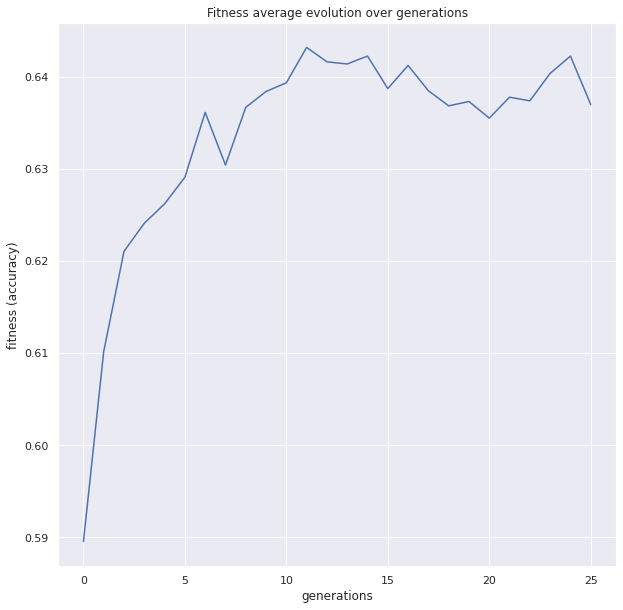

In [ ]:
plot_fitness_evolution(evolved_estimator)
plt.show()

In [ ]:
evolved_estimator.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=24, max_features='log2',
                       max_leaf_nodes=27,
                       min_weight_fraction_leaf=0.01485284373775305,
                       n_estimators=111)

In [ ]:
evolved_estimator.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 24,
 'max_features': 'log2',
 'max_leaf_nodes': 27,
 'min_weight_fraction_leaf': 0.01485284373775305,
 'n_estimators': 111}

In [ ]:
print("Best k solutions:")
evolved_estimator.hof

Best k solutions:


{0: {'bootstrap': False,
  'criterion': 'gini',
  'max_depth': 24,
  'max_features': 'log2',
  'max_leaf_nodes': 27,
  'min_weight_fraction_leaf': 0.01485284373775305,
  'n_estimators': 111},
 1: {'bootstrap': False,
  'criterion': 'gini',
  'max_depth': 23,
  'max_features': 'log2',
  'max_leaf_nodes': 27,
  'min_weight_fraction_leaf': 0.01485284373775305,
  'n_estimators': 111},
 2: {'bootstrap': False,
  'criterion': 'gini',
  'max_depth': 24,
  'max_features': 'log2',
  'max_leaf_nodes': 27,
  'min_weight_fraction_leaf': 0.01485284373775305,
  'n_estimators': 43},
 3: {'bootstrap': False,
  'criterion': 'gini',
  'max_depth': 24,
  'max_features': 'log2',
  'max_leaf_nodes': 27,
  'min_weight_fraction_leaf': 0.01485284373775305,
  'n_estimators': 250}}

###Tuning Using Evolutionary Algorithms

In [ ]:
tic = time.perf_counter()
fobj = open('/content/drive/MyDrive/LogForPython/pokemon.txt', 'w')
fobj.write("number gen,num of evaluations,min weight fraction leaf,bootstrap,max depth,criterion,max features,max leaf nodes,n estimators,fitness\n")
result_and_allParamater = DE(RandomforestWithK_fold,Randomforest, bounds = [(0,0.5),(1,2),(2,30),(1,2),(1,3),(2,35),(10,300)], popsize=256, max_evaluation=1300)
fobj.close()
toc = time.perf_counter()

512
0.646593137254902
768
0.646593137254902
1024
0.646593137254902
1280
0.6473713235294117


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
result = result_and_allParamater[0]
print(np.asarray(result).shape)
print(result)
for res in result:
  print(res[-1])

(5, 2)
[(array([1.95291788e-02, 1.28254741e+00, 1.58242893e+01, 1.07084438e+00,
       2.86351908e+00, 3.25555493e+01, 1.10360467e+02]), 0.6325428921568628), (array([7.35397869e-03, 1.16720277e+00, 1.11286385e+01, 1.84209337e+00,
       2.58236042e+00, 3.50000000e+01, 2.94418433e+02]), 0.646593137254902), (array([7.35397869e-03, 1.16720277e+00, 1.11286385e+01, 1.84209337e+00,
       2.58236042e+00, 3.50000000e+01, 2.94418433e+02]), 0.646593137254902), (array([7.35397869e-03, 1.16720277e+00, 1.11286385e+01, 1.84209337e+00,
       2.58236042e+00, 3.50000000e+01, 2.94418433e+02]), 0.646593137254902), (array([  0.        ,   1.3593274 ,  16.38060694,   1.28130955,
         2.53843349,  32.75249981, 300.        ]), 0.6473713235294117)]
0.6325428921568628
0.646593137254902
0.646593137254902
0.646593137254902
0.6473713235294117


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
all_paramater = result_and_allParamater[1]
all_paramater
#[min_weight_fraction_leaf, bootstrap,max_depth,criterion,max_features,max_leaf_nodes,n_estimators,accuracy_score,recall_score,precision_score,f1_score,confusion_matrix]

[0.0,
 True,
 16,
 'gini',
 'log2',
 33,
 300,
 0.578125,
 array([0.        , 0.        , 0.74615385, 0.61363636, 0.16666667,
        0.        ]),
 array([0.        , 0.        , 0.64666667, 0.51923077, 0.5       ,
        0.        ]),
 array([0.        , 0.        , 0.69285714, 0.5625    , 0.25      ,
        0.        ]),
 array([[ 0,  0,  1,  0,  0,  0],
        [ 0,  0,  6,  4,  0,  0],
        [ 0,  0, 97, 33,  0,  0],
        [ 0,  0, 46, 81,  5,  0],
        [ 0,  0,  0, 35,  7,  0],
        [ 0,  0,  0,  3,  2,  0]]),
 array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 7, 5, 5, 5,
        6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
        6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 7, 5,
        7, 5, 7, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 7, 5, 7, 5, 5, 6, 6, 5, 6,
        6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,
        6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5,
        5, 6, 6, 5, 5,

In [ ]:
print(f"Accuracy: {all_paramater[7]}")

Accuracy: 0.578125


In [ ]:
time_run = toc-tic
print(f"second:{time_run}-minute:{time_run/60}")

second:1913.0628036070048-minute:31.884380060116747


## Compare Decision tree

In [ ]:
tic = time.perf_counter()
print(Randomforest(0.0,
 False,
 30,
 'gini',
 'sqrt',
 35,
 203)[7])
toc = time.perf_counter()
print(toc-tic)

0.575
0.6119963129999633


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

from sklearn.tree import DecisionTreeClassifier
tic = time.perf_counter()
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
toc = time.perf_counter()
print(metrics.accuracy_score(y_test, y_pred))
print(toc-tic)

0.5625
0.017404136000095605


# weatherAUS.csv

In [11]:
df3 = pd.read_csv(file_paths[3])
df3 = df3.dropna()

In [12]:
df3.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [ ]:
y = df3['RainTomorrow']
df3 = df3.drop(columns='RainTomorrow')

In [ ]:
df3 = df3.drop(columns='Date')

df3 = pd.concat([df3, pd.get_dummies(df3['Location'])], axis=1)
df3 = df3.drop(columns='Location')

df3 = pd.concat([df3, pd.get_dummies(df3['WindGustDir'])], axis=1)
df3 = df3.drop(columns='WindGustDir')

df3 = pd.concat([df3, pd.get_dummies(df3['WindDir9am'])], axis=1)
df3 = df3.drop(columns='WindDir9am')

df3 = pd.concat([df3, pd.get_dummies(df3['WindDir3pm'])], axis=1)
df3 = df3.drop(columns='WindDir3pm')

df3 = pd.concat([df3, pd.get_dummies(df3['RainToday'])], axis=1)
df3 = df3.drop(columns='RainToday')

In [ ]:
X = df3

In [ ]:
df3

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,AliceSprings,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Darwin,Hobart,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,NorfolkIsland,Nuriootpa,Perth,PerthAirport,Portland,Sale,Sydney,SydneyAirport,Townsville,WaggaWagga,Watsonia,...,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,No,Yes
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.859092520382843

### Compare SVM

In [ ]:
svm =  make_pipeline(StandardScaler(), SVC())

In [ ]:
svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8652959943282524

### Grid Search

In [ ]:
# Tạo các mảng các giá trị của siêu tham số
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,300,10)
max_leaf_nodes_range = np.arange(2,35,1)

In [ ]:
# Tạo một lưới các tham số
param_grid = dict(max_features=max_features_range, 
                  n_estimators=n_estimators_range,
                  max_leaf_nodes=max_leaf_nodes_range)

In [ ]:
# Khởi tạo mô hình cần tối ưu hóa các siêu tham số
rf = RandomForestClassifier()

In [ ]:
# Sử dụng hàm GridSearch của thư viện sklearn để điểu chỉnh siêu tham số
grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=5)

In [ ]:
# Tiến hành đào tạo
grid.fit(X_train, y_train)

In [ ]:
# In ra kết quả
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

### GA Search

In [ ]:
param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30), 
              'criterion': Categorical(['gini', 'entropy']),
              'max_features': Categorical(['auto', 'sqrt', 'log2']),
              'max_leaf_nodes': Integer(2, 35), 
              'n_estimators': Integer(10, 300)}

In [ ]:
clf = RandomForestClassifier()

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True)

In [ ]:
evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=25,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_train,y_train)

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	10    	0.79591	0.0207385  	0.835741   	0.779732   
1  	20    	0.822616	0.0166408  	0.838311   	0.779732   
2  	17    	0.826799	0.00850767 	0.838311   	0.816488   
3  	20    	0.833485	0.00591147 	0.837934   	0.817308   
4  	18    	0.836275	0.000907253	0.837934   	0.834434   
5  	19    	0.836999	0.000652208	0.837934   	0.835918   
6  	18    	0.836787	0.000412195	0.837269   	0.835918   
7  	17    	0.836789	0.000525212	0.837269   	0.835852   
8  	19    	0.836771	0.000447942	0.837269   	0.836162   
9  	18    	0.837227	0.000434207	0.837691   	0.836516   
10 	17    	0.837086	0.00038691 	0.837624   	0.836406   
11 	15    	0.83734 	0.00030016 	0.837757   	0.836849   
12 	15    	0.837223	0.00053606 	0.837757   	0.835697   
13 	19    	0.837119	0.000490884	0.837668   	0.836206   
14 	19    	0.837469	0.000794593	0.838444   	0.835852   
15 	17    	0.83742 	0.000772565	0.838599   	0.836118   
16 	16    	0.837792	0.000763349	0.838599   	0.8364

GASearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=RandomForestClassifier(max_depth=16, max_leaf_nodes=22,
                                            min_weight_fraction_leaf=0.01647085677417005,
                                            n_estimators=87),
           generations=45, keep_top_k=4, n_jobs=-1,
           param_grid={'bootstrap': <sklearn_genetic.space.space.Categorical object at 0x7f09d0f61dd0>,
                       'criterion': <sklearn_gene...
                       'max_features': <sklearn_genetic.space.space.Categorical object at 0x7f09ed7514d0>,
                       'max_leaf_nodes': <sklearn_genetic.space.space.Integer object at 0x7f09d0f156d0>,
                       'min_weight_fraction_leaf': <sklearn_genetic.space.space.Continuous object at 0x7f09d0f76110>,
                       'n_estimators': <sklearn_genetic.space.space.Integer object at 0x7f09d0f15590>},
           return_train_score=True, scoring='accurac

In [ ]:
y_predicy_ga = evolved_estimator.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predicy_ga)

0.8373803615739099

In [ ]:
accuracy_score(y_train, evolved_estimator.predict(X_train))

0.8383995037220844

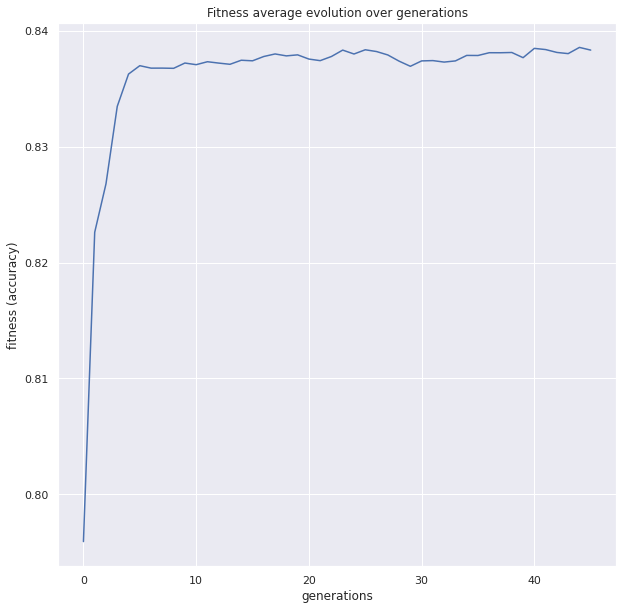

In [ ]:
plot_fitness_evolution(evolved_estimator)
plt.show()

In [ ]:
evolved_estimator.best_estimator_

RandomForestClassifier(max_depth=16, max_leaf_nodes=22,
                       min_weight_fraction_leaf=0.01647085677417005,
                       n_estimators=87)

In [ ]:
evolved_estimator.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'auto',
 'max_leaf_nodes': 22,
 'min_weight_fraction_leaf': 0.01647085677417005,
 'n_estimators': 87}

In [ ]:
print("Best k solutions:")
evolved_estimator.hof

Best k solutions:


{0: {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 16,
  'max_features': 'auto',
  'max_leaf_nodes': 22,
  'min_weight_fraction_leaf': 0.01647085677417005,
  'n_estimators': 87},
 1: {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 30,
  'max_features': 'sqrt',
  'max_leaf_nodes': 27,
  'min_weight_fraction_leaf': 0.01647085677417005,
  'n_estimators': 87},
 2: {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 16,
  'max_features': 'auto',
  'max_leaf_nodes': 22,
  'min_weight_fraction_leaf': 0.01647085677417005,
  'n_estimators': 87},
 3: {'bootstrap': False,
  'criterion': 'gini',
  'max_depth': 14,
  'max_features': 'sqrt',
  'max_leaf_nodes': 26,
  'min_weight_fraction_leaf': 0.01647085677417005,
  'n_estimators': 21}}

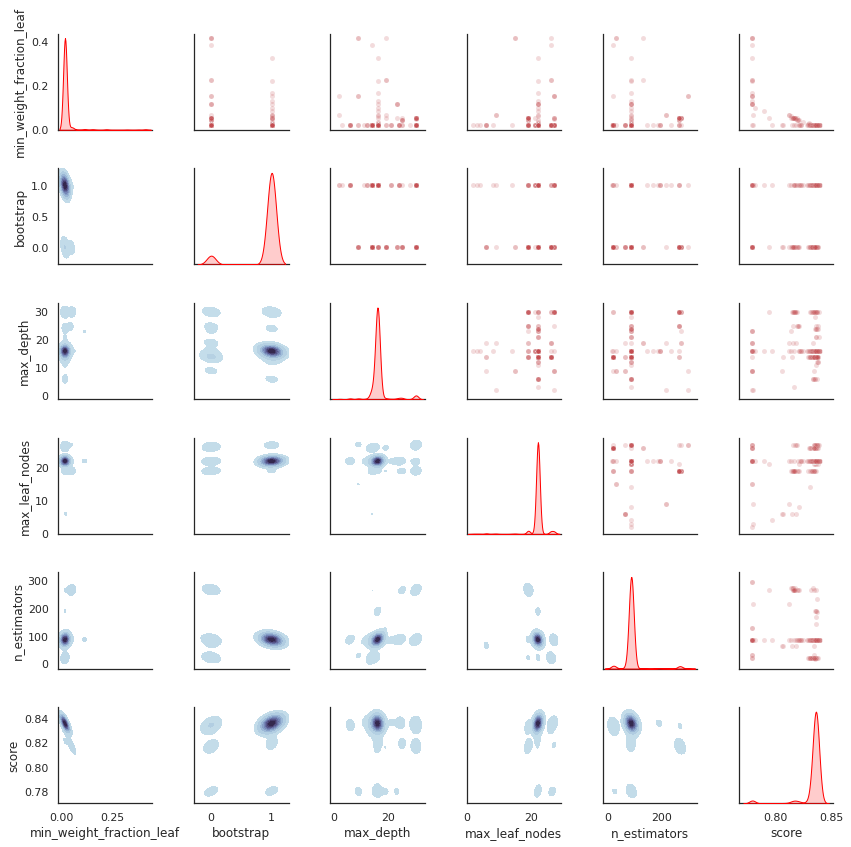

In [ ]:
plot_search_space(evolved_estimator)
plt.show()

###Tuning Using Evolutionary Algorithms

In [ ]:
tic = time.perf_counter()
fobj = open('/content/drive/MyDrive/LogForPython/weatherAUS.txt', 'w')
fobj.write("number gen,num of evaluations,min weight fraction leaf,bootstrap,max depth,criterion,max features,max leaf nodes,n estimators,fitness\n")
result_and_allParamater = DE(RandomforestWithK_fold,Randomforest, bounds = [(0,0.5),(1,2),(2,30),(1,2),(1,3),(2,35),(10,300)], popsize=256, max_evaluation=1300)
fobj.close()
toc = time.perf_counter()

512
0.844381464477733
768
0.8449352552788147
1024
0.8449352552788147
1280
0.8449352552788147


In [ ]:
result = result_and_allParamater[0]
print(np.asarray(result).shape)
print(result)
for res in result:
  print(res[-1])

(5, 2)
[(array([4.46541036e-03, 1.89868144e+00, 1.78927268e+01, 1.24814592e+00,
       2.35941116e+00, 2.26475991e+01, 2.98960998e+01]), 0.8419221339575031), (array([  0.        ,   1.6303061 ,  15.53773179,   1.12204941,
         1.51096613,  35.        , 222.10096115]), 0.844381464477733), (array([ 0.        ,  1.        , 27.96791858,  1.26834946,  1.        ,
       35.        , 86.527974  ]), 0.8449352552788147), (array([ 0.        ,  1.        , 27.96791858,  1.26834946,  1.        ,
       35.        , 86.527974  ]), 0.8449352552788147), (array([ 0.        ,  1.        , 27.96791858,  1.26834946,  1.        ,
       35.        , 86.527974  ]), 0.8449352552788147)]
0.8419221339575031
0.844381464477733
0.8449352552788147
0.8449352552788147
0.8449352552788147


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
all_paramater = result_and_allParamater[1]
all_paramater
#[min_weight_fraction_leaf, bootstrap,max_depth,criterion,max_features,max_leaf_nodes,n_estimators,accuracy_score,recall_score,precision_score,f1_score,confusion_matrix]

[0.0,
 True,
 28,
 'gini',
 'auto',
 35,
 87,
 0.8423431407302375,
 array([0.97408796, 0.37585513]),
 array([0.84676941, 0.80378657]),
 array([0.90597749, 0.51220181]),
 array([[8571,  228],
        [1551,  934]]),
 array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)]

In [ ]:
print(f"Accuracy: {all_paramater[7]}")

Accuracy: 0.8423431407302375


In [ ]:
time_run = toc-tic
print(f"second:{time_run}-minute:{time_run/60}")

second:14888.225822757999-minute:248.13709704596664


## Compare Decision tree

In [ ]:
tic = time.perf_counter()
print(Randomforest(0.0,False,26,'gini','sqrt',35,117)[7])
toc = time.perf_counter()
print(toc-tic)

0.8449131513647643
6.332236805000321


In [ ]:

from sklearn.tree import DecisionTreeClassifier
tic = time.perf_counter()
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
toc = time.perf_counter()
print(metrics.accuracy_score(y_test, y_pred))
print(toc-tic)

0.7988302020560085
1.3588169730001027


# winequality-red.csv

In [14]:
df4 = pd.read_csv(file_paths[4])
df4 = df4.dropna()

In [15]:
df4.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [ ]:
y = df4['quality']
df4 = df4.drop(columns='quality')

In [ ]:
df4

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
X = df4

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.671875

### Compare SVM

In [ ]:
svm =  make_pipeline(StandardScaler(), SVC())

In [ ]:
svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.603125

### Grid Search

In [ ]:
# Tạo các mảng các giá trị của siêu tham số
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,300,10)
max_leaf_nodes_range = np.arange(2,35,1)

In [ ]:
# Tạo một lưới các tham số
param_grid = dict(max_features=max_features_range, 
                  n_estimators=n_estimators_range,
                  max_leaf_nodes=max_leaf_nodes_range)

In [ ]:
# Khởi tạo mô hình cần tối ưu hóa các siêu tham số
rf = RandomForestClassifier()

In [ ]:
# Sử dụng hàm GridSearch của thư viện sklearn để điểu chỉnh siêu tham số
grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=5)

In [ ]:
# Tiến hành đào tạo
grid.fit(X_train, y_train)

In [ ]:
# In ra kết quả
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

### GA Search

In [ ]:
param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30), 
              'criterion': Categorical(['gini', 'entropy']),
              'max_features': Categorical(['auto', 'sqrt', 'log2']),
              'max_leaf_nodes': Integer(2, 35), 
              'n_estimators': Integer(10, 300)}

In [ ]:
clf = RandomForestClassifier()

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True)

In [ ]:
evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=25,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_train,y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.596165	0.020517   	0.631745   	0.559026   
1  	18    	0.613203	0.0121449  	0.63173    	0.595009   
2  	19    	0.615248	0.013396   	0.634878   	0.592662   
3  	17    	0.626115	0.00919853 	0.636427   	0.602821   
4  	16    	0.630893	0.00279724 	0.636427   	0.628648   
5  	17    	0.632064	0.0029797  	0.636427   	0.628648   
6  	18    	0.630568	0.00547388 	0.638795   	0.61769    
7  	16    	0.635265	0.00242826 	0.63878    	0.630948   
8  	20    	0.635111	0.00229557 	0.638005   	0.630948   
9  	17    	0.63566 	0.00279809 	0.641142   	0.630182   
10 	18    	0.636286	0.00206314 	0.641142   	0.634107   
11 	18    	0.637381	0.00290064 	0.641142   	0.630975   
12 	18    	0.639023	0.00294198 	0.645034   	0.634893   
13 	18    	0.63965 	0.00343039 	0.645034   	0.635655   
14 	18    	0.63746 	0.00614147 	0.645813   	0.627072   
15 	19    	0.639487	0.00487535 	0.645813   	0.63018    
16 	17    	0.640583	0.00439318 	0.645813   	0.63

GASearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=RandomForestClassifier(max_depth=7, max_features='sqrt',
                                            max_leaf_nodes=29,
                                            min_weight_fraction_leaf=0.014338259357692609,
                                            n_estimators=279),
           generations=45, keep_top_k=4, n_jobs=-1,
           param_grid={'bootstrap': <sklearn_genetic.space.space.Categorical object at 0x7f2337ceb1d0>,
                       'cri...
                       'max_features': <sklearn_genetic.space.space.Categorical object at 0x7f2337cebd50>,
                       'max_leaf_nodes': <sklearn_genetic.space.space.Integer object at 0x7f2337ceb790>,
                       'min_weight_fraction_leaf': <sklearn_genetic.space.space.Continuous object at 0x7f2337ceb450>,
                       'n_estimators': <sklearn_genetic.space.space.Integer object at 0x7f2337cebad0>},
        

In [ ]:
y_predicy_ga = evolved_estimator.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predicy_ga)

0.575

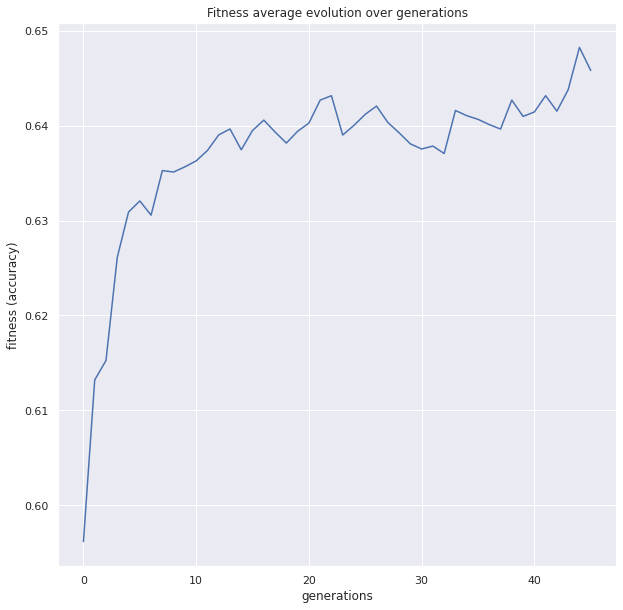

In [ ]:
plot_fitness_evolution(evolved_estimator)
plt.show()

In [ ]:
evolved_estimator.best_estimator_

RandomForestClassifier(max_depth=7, max_features='sqrt', max_leaf_nodes=29,
                       min_weight_fraction_leaf=0.014338259357692609,
                       n_estimators=279)

In [ ]:
evolved_estimator.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': 29,
 'min_weight_fraction_leaf': 0.014338259357692609,
 'n_estimators': 279}

In [ ]:
print("Best k solutions:")
evolved_estimator.hof

Best k solutions:


{0: {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 7,
  'max_features': 'sqrt',
  'max_leaf_nodes': 29,
  'min_weight_fraction_leaf': 0.014338259357692609,
  'n_estimators': 279},
 1: {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 7,
  'max_features': 'sqrt',
  'max_leaf_nodes': 29,
  'min_weight_fraction_leaf': 0.014338259357692609,
  'n_estimators': 279},
 2: {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 7,
  'max_features': 'sqrt',
  'max_leaf_nodes': 29,
  'min_weight_fraction_leaf': 0.014338259357692609,
  'n_estimators': 209},
 3: {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': 7,
  'max_features': 'sqrt',
  'max_leaf_nodes': 29,
  'min_weight_fraction_leaf': 0.014338259357692609,
  'n_estimators': 279}}

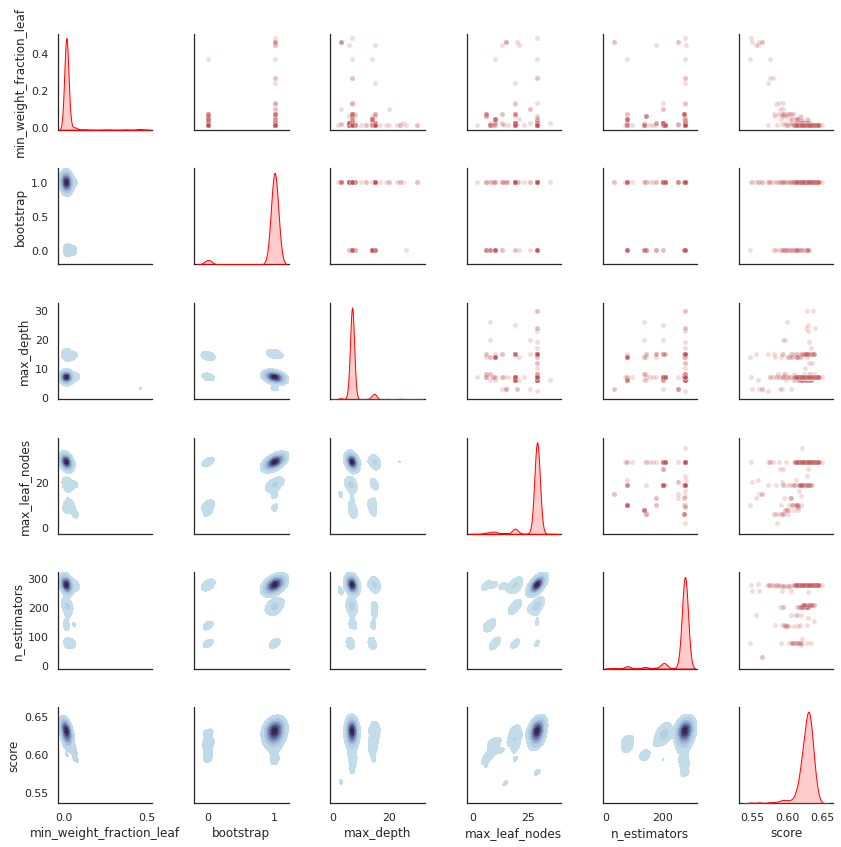

In [ ]:
plot_search_space(evolved_estimator)
plt.show()

### Tuning Using Evolutionary Algorithms

In [ ]:
tic = time.perf_counter()
fobj = open('/content/drive/MyDrive/LogForPython/winequality-red.txt', 'w')
fobj.write("number gen,num of evaluations,min weight fraction leaf,bootstrap,max depth,criterion,max features,max leaf nodes,n estimators,fitness\n")
result_and_allParamater = DE(RandomforestWithK_fold,Randomforest, bounds = [(0,0.5),(1,2),(2,30),(1,2),(1,3),(2,35),(10,300)], popsize=256, max_evaluation=2600)
fobj.close()
toc = time.perf_counter()

512
0.6450582107843138
768
0.6450582107843138
1024
0.646623774509804
1280
0.6559773284313726
1536
0.6559773284313726
1792
0.6559773284313726
2048
0.6559773284313726
2304
0.6559773284313726
2560
0.6559773284313726


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
result = result_and_allParamater[0]
print(np.asarray(result).shape)
print(result)
for res in result:
  print(res[-1])

(10, 2)
[(array([2.09244587e-02, 1.65750600e+00, 1.08466804e+01, 1.45059835e+00,
       1.86640021e+00, 3.15081828e+01, 2.98306023e+02]), 0.6450582107843138), (array([2.09244587e-02, 1.65750600e+00, 1.08466804e+01, 1.45059835e+00,
       1.86640021e+00, 3.15081828e+01, 2.98306023e+02]), 0.6450582107843138), (array([2.09244587e-02, 1.65750600e+00, 1.08466804e+01, 1.45059835e+00,
       1.86640021e+00, 3.15081828e+01, 2.98306023e+02]), 0.6450582107843138), (array([  0.        ,   1.70845762,  19.00552116,   1.26600795,
         3.        ,  35.        , 300.        ]), 0.646623774509804), (array([  0.        ,   1.68982221,  25.69626614,   1.05159467,
         1.99506324,  35.        , 204.1195448 ]), 0.6559773284313726), (array([  0.        ,   1.68982221,  25.69626614,   1.05159467,
         1.99506324,  35.        , 204.1195448 ]), 0.6559773284313726), (array([  0.        ,   1.68982221,  25.69626614,   1.05159467,
         1.99506324,  35.        , 204.1195448 ]), 0.6559773284313726)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
all_paramater = result_and_allParamater[1]
all_paramater
#[min_weight_fraction_leaf, bootstrap,max_depth,criterion,max_features,max_leaf_nodes,n_estimators,accuracy_score,recall_score,precision_score,f1_score,confusion_matrix]

[0.0,
 False,
 26,
 'gini',
 'sqrt',
 35,
 204,
 0.584375,
 array([0.        , 0.        , 0.76153846, 0.60606061, 0.19047619,
        0.        ]),
 array([0.        , 0.        , 0.64705882, 0.52980132, 0.5       ,
        0.        ]),
 array([0.        , 0.        , 0.69964664, 0.56537102, 0.27586207,
        0.        ]),
 array([[ 0,  0,  1,  0,  0,  0],
        [ 0,  0,  6,  4,  0,  0],
        [ 0,  0, 99, 30,  1,  0],
        [ 0,  0, 47, 80,  5,  0],
        [ 0,  0,  0, 34,  8,  0],
        [ 0,  0,  0,  3,  2,  0]]),
 array([5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 7, 5, 5, 5,
        6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
        6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 7, 5,
        7, 5, 7, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 7, 5, 6, 5, 5, 6, 6, 5, 6,
        6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,
        6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5,
        5, 6, 6, 5, 5

In [ ]:
print(f"Accuracy: {all_paramater[7]}")

Accuracy: 0.584375


In [ ]:
time_run = toc-tic
print(f"second:{time_run}-minute:{time_run/60}")

second:5071.794872455999-minute:84.52991454093332


## Compare Decision tree

In [ ]:
tic = time.perf_counter()
print(Randomforest(0.0,False,26,'gini','sqrt',35,204)[7])
toc = time.perf_counter()
print(toc-tic)

0.575
0.6564828069999749


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

from sklearn.tree import DecisionTreeClassifier
tic = time.perf_counter()
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
toc = time.perf_counter()
print(metrics.accuracy_score(y_test, y_pred))
print(toc-tic)

0.565625
0.020208040999932564


# MNIST

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [ ]:
X, y = mnist["data"], mnist["target"]

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9692

### Compare SVM

In [ ]:
svm =  make_pipeline(StandardScaler(), SVC())

In [ ]:
svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.966

### Grid Search

In [ ]:
# Tạo các mảng các giá trị của siêu tham số
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,300,10)
max_leaf_nodes_range = np.arange(2,35,1)

In [ ]:
# Tạo một lưới các tham số
param_grid = dict(max_features=max_features_range, 
                  n_estimators=n_estimators_range,
                  max_leaf_nodes=max_leaf_nodes_range)

In [ ]:
# Khởi tạo mô hình cần tối ưu hóa các siêu tham số
rf = RandomForestClassifier()

In [ ]:
# Sử dụng hàm GridSearch của thư viện sklearn để điểu chỉnh siêu tham số
grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=5)

In [ ]:
# Tiến hành đào tạo
grid.fit(X_train, y_train)

In [ ]:
# In ra kết quả
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

## GASearchCV

In [ ]:
param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30), 
              'criterion': Categorical(['gini', 'entropy']),
              'max_features': Categorical(['auto', 'sqrt', 'log2']),
              'max_leaf_nodes': Integer(2, 35), 
              'n_estimators': Integer(10, 210)}

In [ ]:
clf = RandomForestClassifier()

cv = StratifiedKFold(n_splits=3, shuffle=True)

evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=15,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_train,y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.696042	0.10448    	0.855417   	0.462917   
1  	17    	0.746357	0.104111   	0.855417   	0.481067   
2  	20    	0.800155	0.045511   	0.855417   	0.735417   
3  	18    	0.836627	0.0104193  	0.850483   	0.818083   
4  	19    	0.847858	0.00198388 	0.849633   	0.84285    
5  	19    	0.849435	0.00190104 	0.85165    	0.84585    
6  	19    	0.850073	0.00178066 	0.85165    	0.846283   
7  	20    	0.850925	0.00115888 	0.853      	0.84905    
8  	17    	0.851347	0.00075424 	0.853      	0.850467   
9  	17    	0.851802	0.000765777	0.853167   	0.85055    
10 	18    	0.852832	0.00129886 	0.85515    	0.851483   
11 	19    	0.852823	0.00126781 	0.85515    	0.851667   
12 	16    	0.854317	0.00112445 	0.85515    	0.852267   
13 	18    	0.854948	0.000760462	0.85595    	0.85355    
14 	15    	0.855428	0.000634737	0.856483   	0.8546     
15 	17    	0.855785	0.000526332	0.8566     	0.85465    


GASearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=RandomForestClassifier(max_depth=17, max_leaf_nodes=31,
                                            min_weight_fraction_leaf=0.02326561288964513,
                                            n_estimators=196),
           generations=15, keep_top_k=4, n_jobs=-1,
           param_grid={'max_depth': <sklearn_genetic.space.space.Integer object at 0x7f3735cdc790>,
                       'max_leaf_nodes': <sklearn_genetic.space.space.Integer object at 0x7f3735cdc750>,
                       'min_weight_fraction_leaf': <sklearn_genetic.space.space.Continuous object at 0x7f3735cdc590>,
                       'n_estimators': <sklearn_genetic.space.space.Integer object at 0x7f3735cdc710>},
           return_train_score=True, scoring='accuracy')

In [ ]:
y_predicy_ga = evolved_estimator.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predicy_ga)

0.8618

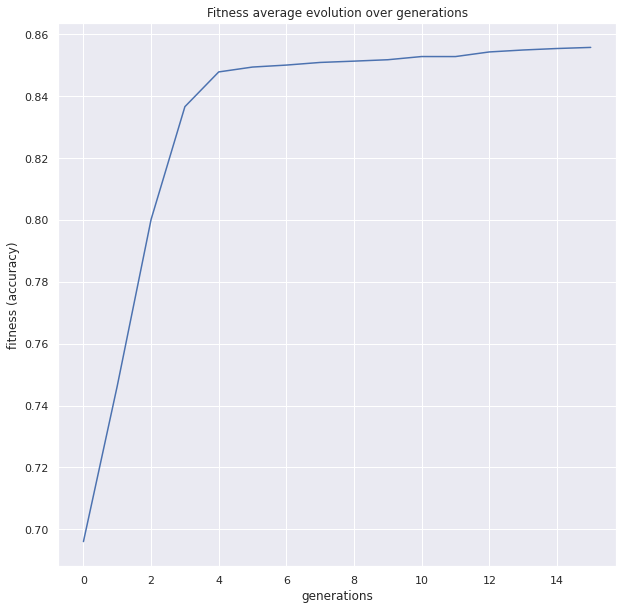

In [ ]:
plot_fitness_evolution(evolved_estimator)
plt.show()

In [ ]:
evolved_estimator.best_estimator_

RandomForestClassifier(max_depth=17, max_leaf_nodes=31,
                       min_weight_fraction_leaf=0.02326561288964513,
                       n_estimators=196)

In [ ]:
evolved_estimator.best_params_

{'max_depth': 17,
 'max_leaf_nodes': 31,
 'min_weight_fraction_leaf': 0.02326561288964513,
 'n_estimators': 196}

In [ ]:
print("Best k solutions:")
evolved_estimator.hof

Best k solutions:


{0: {'max_depth': 17,
  'max_leaf_nodes': 31,
  'min_weight_fraction_leaf': 0.02326561288964513,
  'n_estimators': 196},
 1: {'max_depth': 17,
  'max_leaf_nodes': 35,
  'min_weight_fraction_leaf': 0.02326561288964513,
  'n_estimators': 196},
 2: {'max_depth': 8,
  'max_leaf_nodes': 31,
  'min_weight_fraction_leaf': 0.02326561288964513,
  'n_estimators': 196},
 3: {'max_depth': 17,
  'max_leaf_nodes': 32,
  'min_weight_fraction_leaf': 0.02326561288964513,
  'n_estimators': 196}}

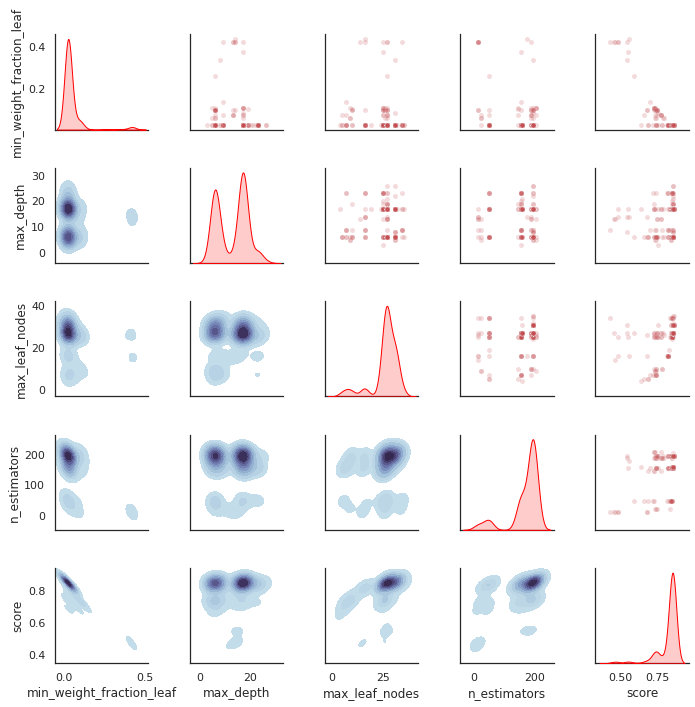

In [ ]:
plot_search_space(evolved_estimator)
plt.show()

## Tuning Using Evolutionary Algorithms

In [ ]:
tic = time.perf_counter()
fobj = open('/content/drive/MyDrive/LogForPython/MNIST.txt', 'w')
fobj.write("number gen,num of evaluations,min weight fraction leaf,bootstrap,max depth,criterion,max features,max leaf nodes,n estimators,fitness\n")
result_and_allParamater = DE(RandomforestWithK_fold,Randomforest, bounds = [(0,0.5),(1,2),(2,30),(1,2),(1,3),(2,35),(10,300)], popsize=256, max_evaluation=1300)
fobj.close()
toc = time.perf_counter()

In [ ]:
result = result_and_allParamater[0]
print(np.asarray(result).shape)
print(result)
for res in result:
  print(res[-1])

In [ ]:
all_paramater = result_and_allParamater[1]
all_paramater
#[min_weight_fraction_leaf, bootstrap,max_depth,criterion,max_features,max_leaf_nodes,n_estimators,accuracy_score,recall_score,precision_score,f1_score,confusion_matrix]

In [ ]:
print(f"Accuracy: {all_paramater[7]}")

In [ ]:
time_run = toc-tic
print(f"second:{time_run}-minute:{time_run/60}")

## Compare Decision tree

In [ ]:
tic = time.perf_counter()
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
toc = time.perf_counter()
print(toc-tic)


0.969
54.08234558100003


In [ ]:
tic = time.perf_counter()
print(Randomforest(0.0,False,26,'gini','sqrt',35,204)[7])
toc = time.perf_counter()
print(toc-tic)

0.881
51.24132998799996


In [ ]:

from sklearn.tree import DecisionTreeClassifier
tic = time.perf_counter()
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
toc = time.perf_counter()
print(metrics.accuracy_score(y_test, y_pred))
print(toc-tic)

0.8761
23.17211241699988


# Olympics

In [17]:
df4 = pd.read_csv(file_paths[0],encoding = "ISO-8859-1")
df4 = df4.dropna()

In [18]:
df4.head(5)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [19]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB


In [ ]:
df4 = df4.drop(columns='Country')
df4 = df4.drop(columns='Athlete')

In [ ]:
y = df4['Medal']
df4 = df4.drop(columns='Medal')

In [ ]:
df4.City = pd.Categorical(df4.City)
df4['City'] = df4.City.cat.codes
df4.Year = pd.Categorical(df4.Year)
df4['Year'] = df4.Year.cat.codes
df4.Sport = pd.Categorical(df4.Sport)
df4['Sport'] = df4.Sport.cat.codes
df4.Event = pd.Categorical(df4.Event)
df4['Event'] = df4.Event.cat.codes
df4.Discipline = pd.Categorical(df4.Discipline)
df4['Discipline'] = df4.Discipline.cat.codes
df4.Gender = pd.Categorical(df4.Gender)
df4['Gender'] = df4.Gender.cat.codes
df4.Country_Code = pd.Categorical(df4.Country_Code)
df4['Country_Code'] = df4.Country_Code.cat.codes
df4.Event_gender = pd.Categorical(df4.Event_gender)
df4['Event_gender'] = df4.Event_gender.cat.codes


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15316 entries, 0 to 15432
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   City          15316 non-null  int8 
 1   Year          15316 non-null  int8 
 2   Sport         15316 non-null  int8 
 3   Discipline    15316 non-null  int8 
 4   Event         15316 non-null  int16
 5   Gender        15316 non-null  int8 
 6   Country_Code  15316 non-null  int16
 7   Event_gender  15316 non-null  int8 
dtypes: int16(2), int8(6)
memory usage: 269.2 KB


In [ ]:
X = df4

In [ ]:
y

0        Silver
1        Bronze
2          Gold
3        Silver
4        Bronze
          ...  
15428    Bronze
15429      Gold
15430    Silver
15431      Gold
15432      Gold
Name: Medal, Length: 15316, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Compare SVM

In [ ]:
svm =  make_pipeline(StandardScaler(), SVC())

In [ ]:
%%time
svm.fit(X_train, y_train)

CPU times: user 1min 49s, sys: 269 ms, total: 1min 49s
Wall time: 1min 49s


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.4549608355091384

### GA Search

In [ ]:
param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30), 
              'criterion': Categorical(['gini', 'entropy']),
              'max_features': Categorical(['auto', 'sqrt', 'log2']),
              'max_leaf_nodes': Integer(2, 35), 
              'n_estimators': Integer(10, 300)}

In [ ]:
clf = RandomForestClassifier()

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True)

In [ ]:
evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=20,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
evolved_estimator.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.370821	0.0220297  	0.409158   	0.345331   
1  	20    	0.385594	0.0219729  	0.409484   	0.354554   
2  	16    	0.400939	0.0149121  	0.409484   	0.370878   
3  	16    	0.408684	0.000955887	0.409158   	0.406056   
4  	19    	0.410619	0.00107443 	0.411851   	0.409158   
5  	19    	0.4107  	0.0013319  	0.412178   	0.40728    
6  	18    	0.412104	0.00167566 	0.413402   	0.408994   
7  	20    	0.412259	0.00113624 	0.413402   	0.410219   
8  	17    	0.412977	0.00119108 	0.416014   	0.411525   
9  	18    	0.412243	0.00195812 	0.416014   	0.409321   
10 	17    	0.412439	0.00195743 	0.413728   	0.407852   
11 	16    	0.413647	0.00182433 	0.416748   	0.410872   
12 	19    	0.413353	0.00335994 	0.416748   	0.404669   
13 	18    	0.414789	0.00171439 	0.416748   	0.411851   
14 	17    	0.413214	0.00329505 	0.416748   	0.40573    
15 	19    	0.411778	0.00158285 	0.414055   	0.409811   
16 	16    	0.413426	0.0023238  	0.416585   	0.40

GASearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
           estimator=RandomForestClassifier(max_depth=21, max_features='sqrt',
                                            max_leaf_nodes=14,
                                            min_weight_fraction_leaf=0.014155911067460877,
                                            n_estimators=168),
           generations=20, keep_top_k=4, n_jobs=-1,
           param_grid={'bootstrap': <sklearn_genetic.space.space.Categorical object at 0x7f184f931fd0>,
                       'cr...
                       'max_features': <sklearn_genetic.space.space.Categorical object at 0x7f184f931490>,
                       'max_leaf_nodes': <sklearn_genetic.space.space.Integer object at 0x7f184f931550>,
                       'min_weight_fraction_leaf': <sklearn_genetic.space.space.Continuous object at 0x7f181ccab550>,
                       'n_estimators': <sklearn_genetic.space.space.Integer object at 0x7f184f931750>},
        

In [ ]:
y_predicy_ga = evolved_estimator.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predicy_ga)

0.575

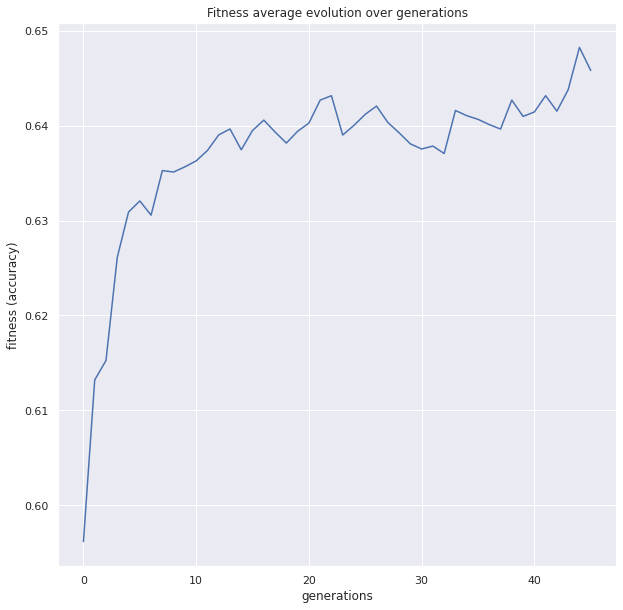

In [ ]:
plot_fitness_evolution(evolved_estimator)
plt.show()

In [ ]:
evolved_estimator.best_estimator_

RandomForestClassifier(max_depth=7, max_features='sqrt', max_leaf_nodes=29,
                       min_weight_fraction_leaf=0.014338259357692609,
                       n_estimators=279)

In [ ]:
evolved_estimator.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': 29,
 'min_weight_fraction_leaf': 0.014338259357692609,
 'n_estimators': 279}

In [ ]:
print("Best k solutions:")
evolved_estimator.hof

Best k solutions:


{0: {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 7,
  'max_features': 'sqrt',
  'max_leaf_nodes': 29,
  'min_weight_fraction_leaf': 0.014338259357692609,
  'n_estimators': 279},
 1: {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 7,
  'max_features': 'sqrt',
  'max_leaf_nodes': 29,
  'min_weight_fraction_leaf': 0.014338259357692609,
  'n_estimators': 279},
 2: {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 7,
  'max_features': 'sqrt',
  'max_leaf_nodes': 29,
  'min_weight_fraction_leaf': 0.014338259357692609,
  'n_estimators': 209},
 3: {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': 7,
  'max_features': 'sqrt',
  'max_leaf_nodes': 29,
  'min_weight_fraction_leaf': 0.014338259357692609,
  'n_estimators': 279}}

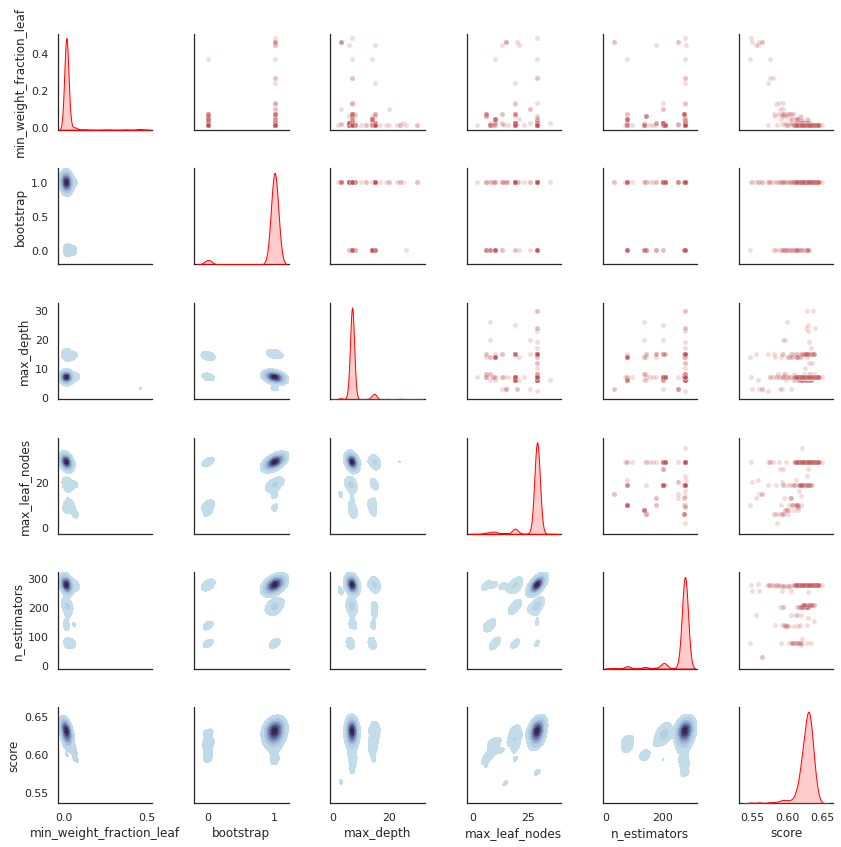

In [ ]:
plot_search_space(evolved_estimator)
plt.show()

##Tuning Using Evolutionary Algorithms

In [ ]:
tic = time.perf_counter()
fobj = open('/content/drive/MyDrive/LogForPython/Olympics.txt', 'w')
fobj.write("number gen,num of evaluations,min weight fraction leaf,bootstrap,max depth,criterion,max features,max leaf nodes,n estimators,fitness\n")
result_and_allParamater = DE(RandomforestWithK_fold,Randomforest, bounds = [(0,0.5),(1,2),(2,30),(1,2),(1,3),(2,35),(10,300)], popsize=128, max_evaluation=1300)
fobj.close()
toc = time.perf_counter()

256
0.5239144372559305
384
0.5292206596224781
512
0.5377918883587707
640
0.5381989192249728
768
0.5390123481461128
896
0.5390123481461128
1024
0.5390123481461128
1152
0.5390123481461128
1280
0.5398302733578131


In [ ]:
result = result_and_allParamater[0]
print(np.asarray(result).shape)
print(result)
for res in result:
  print(res[-1])

(10, 2)
[(array([5.05922391e-04, 1.05459436e+00, 1.93914364e+01, 1.29266695e+00,
       1.74199705e+00, 2.63126378e+01, 1.45009734e+02]), 0.5022048476673411), (array([  0.        ,   1.        ,  20.15682079,   1.27436404,
         1.34228451,  35.        , 230.8408267 ]), 0.5239144372559305), (array([  0.        ,   1.31245047,  14.51244806,   1.22182568,
         2.74978043,  35.        , 239.87642717]), 0.5292206596224781), (array([  0.        ,   1.78854022,  27.01074767,   1.08039142,
         1.06435436,  35.        , 125.77972637]), 0.5377918883587707), (array([  0.        ,   1.19362667,  14.45044769,   2.        ,
         3.        ,  35.        , 235.34330442]), 0.5381989192249728), (array([  0.        ,   2.        ,  30.        ,   2.        ,
         3.        ,  35.        , 226.16245923]), 0.5390123481461128), (array([  0.        ,   2.        ,  30.        ,   2.        ,
         3.        ,  35.        , 226.16245923]), 0.5390123481461128), (array([  0.        ,   2

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
all_paramater = result_and_allParamater[1]
print(all_paramater)
#[min_weight_fraction_leaf, bootstrap,max_depth,criterion,max_features,max_leaf_nodes,n_estimators,accuracy_score,recall_score,precision_score,f1_score,confusion_matrix]

[0.0, True, 30, 'entropy', 'log2', 35, 235, 0.514686684073107, array([0.77409932, 0.40364334, 0.36317907]), array([0.44215795, 0.6057554 , 0.63222417]), array([0.56283186, 0.4844649 , 0.46134185]), array([[795, 135,  97],
       [509, 421, 113],
       [494, 139, 361]]), array(['Bronze', 'Bronze', 'Silver', ..., 'Gold', 'Gold', 'Gold'],
      dtype=object)]


In [ ]:
print(f"Accuracy: {all_paramater[7]}")

Accuracy: 0.514686684073107


In [ ]:
time_run = toc-tic
print(f"second:{time_run}-minute:{time_run/60}")

second:4923.288291873001-minute:82.05480486455002


## Compare Decision tree

In [ ]:
tic = time.perf_counter()
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
toc = time.perf_counter()
print(toc-tic)


0.7121409921671018
1.215362584000104


In [ ]:
tic = time.perf_counter()
print(Randomforest(0.0,True,30,'entropy','log2',35,235)[7])
toc = time.perf_counter()
print(toc-tic)

0.5218668407310705
1.7408599959999265


In [ ]:

from sklearn.tree import DecisionTreeClassifier
tic = time.perf_counter()
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
toc = time.perf_counter()
print(metrics.accuracy_score(y_test, y_pred))
print(toc-tic)

0.7389033942558747
0.05707521499971335
